In [6]:
import pandas as pd
data = pd.read_csv('globalterrorismdb_shorter.csv')
data.head(5)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nkill,nkillter,nwound,nwoundte,property,propextent,propextent_txt,ishostkid,nhostkid,dbsource
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,1.0,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,PGIS
1,197000000002,1970,0,0,0,130,Mexico,1,North America,NaN,...,0.0,NaN,0.0,NaN,0,NaN,NaN,1.0,1.0,PGIS
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,1.0,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,PGIS
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0,NaN,PGIS
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0,NaN,PGIS


In [29]:
subdata = data[["iyear", "country_txt", "location", "attacktype1_txt", "weaptype1_txt", "gname"]]
subdata.head(10)

,iyear,country_txt,location,attacktype1_txt,weaptype1_txt,gname
0,1970,Dominican Republic,NaN,Assassination,Unknown,MANO-D
1,1970,Mexico,NaN,Hostage Taking (Kidnapping),Unknown,23rd of September Communist League
2,1970,Philippines,NaN,Assassination,Unknown,Unknown
3,1970,Greece,NaN,Bombing/Explosion,Explosives/Bombs/Dynamite,Unknown
4,1970,Japan,NaN,Facility/Infrastructure Attack,Incendiary,Unknown
5,1970,United States,NaN,Armed Assault,Firearms,Black Nationalists
6,1970,Uruguay,NaN,Assassination,Firearms,Tupamaros (Uruguay)
7,1970,United States,Edes Substation,Bombing/Explosion,Explosives/Bombs/Dynamite,Unknown
8,1970,United States,NaN,Facility/Infrastructure Attack,Incendiary,New Year's Gang
9,1970,United States,NaN,Facility/Infrastructure Attack,Incendiary,New Year's Gang


In [37]:
subdata = subdata.dropna(axis=0, how='any')
subdata.head(10)

,iyear,country_txt,location,attacktype1_txt,weaptype1_txt,gname
7,1970,United States,Edes Substation,Bombing/Explosion,Explosives/Bombs/Dynamite,Unknown
14,1970,United States,Caparra Shopping Center,Facility/Infrastructure Attack,Incendiary,Armed Commandos of Liberation
17,1970,United States,Brooklyn,Bombing/Explosion,Explosives/Bombs/Dynamite,Black Nationalists
20,1970,United States,Champaign Police Department,Facility/Infrastructure Attack,Incendiary,Black Nationalists
22,1970,United States,Seattle University,Bombing/Explosion,Explosives/Bombs/Dynamite,Black Nationalists
24,1970,United States,Front of building,Facility/Infrastructure Attack,Incendiary,White extremists
30,1970,United States,Manhattan,Armed Assault,Firearms,Black Nationalists
32,1970,United States,Queens,Armed Assault,Firearms,Black Nationalists
35,1970,United States,Front of building,Bombing/Explosion,Explosives/Bombs/Dynamite,White extremists
36,1970,United States,210 East 10 St.,Bombing/Explosion,Explosives/Bombs/Dynamite,Strikers


In [56]:
cleaned_data = subdata[(subdata["country_txt"]=="United Kingdom") & (subdata["attacktype1_txt"]!="Unknown") 
                       & (subdata["weaptype1_txt"]!="Unknown") & (subdata["gname"]!="Unknown") 
                       & ((subdata["iyear"]>=1995) & (subdata["iyear"]<=2016))]

cleaned_data.head(15)

,iyear,country_txt,location,attacktype1_txt,weaptype1_txt,gname
62579,1996,United Kingdom,Corporation Street outside the Arndale shoppin...,Bombing/Explosion,Explosives/Bombs/Dynamite,Irish Republican Army (IRA)
67438,1998,United Kingdom,Belfast (Capital City),Armed Assault,Firearms,Loyalist Volunteer Forces (LVF)
67451,1998,United Kingdom,County Down,Bombing/Explosion,Explosives/Bombs/Dynamite,Continuity Irish Republican Army (CIRA)
67460,1998,United Kingdom,Belfast (Capital City),Armed Assault,Firearms,Loyalist Volunteer Forces (LVF)
67478,1998,United Kingdom,Londonderry (County),Armed Assault,Firearms,Loyalist Volunteer Forces (LVF)
67486,1998,United Kingdom,Belfast (Capital City),Armed Assault,Firearms,Irish National Liberation Army (INLA)
67487,1998,United Kingdom,Belfast (Capital City),Armed Assault,Firearms,Irish National Liberation Army (INLA)
67504,1998,United Kingdom,Fermanagh (County),Bombing/Explosion,Explosives/Bombs/Dynamite,Continuity Irish Republican Army (CIRA)
67538,1998,United Kingdom,Belfast (Capital City),Armed Assault,Firearms,Irish Republican Army (IRA)
67539,1998,United Kingdom,Belfast (Capital City),Armed Assault,Firearms,Irish Republican Army (IRA)


In [57]:
listOfGroups = cleaned_data["gname"].value_counts()
listOfGroups[:20]

Dissident Republicans                                    54
Real Irish Republican Army (RIRA)                        36
Irish Republican Army (IRA)                              33
Oglaigh na hEireann                                      28
Red Hand Defenders (RHD)                                 23
Continuity Irish Republican Army (CIRA)                  21
Loyalists                                                21
Irish Republican Extremists                              17
Loyalist Volunteer Forces (LVF)                          15
The New Irish Republican Army                            15
Ulster Volunteer Force (UVF)                             14
Protestant extremists                                    14
Ulster Freedom Fighters (UFF)                            14
Animal Rights extremists                                 11
Orange Volunteers (OV)                                   11
Irish National Liberation Army (INLA)                     8
Animal Liberation Front (ALF)           

In [58]:
listOfAttacks = cleaned_data["attacktype1_txt"].value_counts()
listOfAttacks

Bombing/Explosion                 231
Armed Assault                      83
Facility/Infrastructure Attack     41
Assassination                       9
Hijacking                           8
Unarmed Assault                     7
Hostage Taking (Kidnapping)         4
Name: attacktype1_txt, dtype: int64

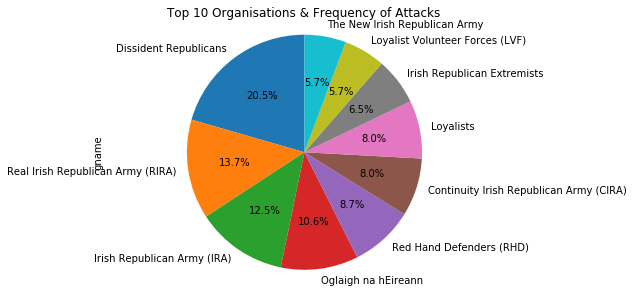

In [59]:
##after = cleaned_data.groupby('gname').count()

import matplotlib.pyplot as plt

listOfGroups = listOfGroups[:10]
#listOfGroups

listOfGroups.plot.pie(x="y".index,
               shadow=False,   # exploding 'Friday'
               startangle=90,
               autopct='%1.1f%%')

plt.axis('equal')
plt.tight_layout()
plt.title("Top 10 Organisations & Frequency of Attacks")
plt.show()


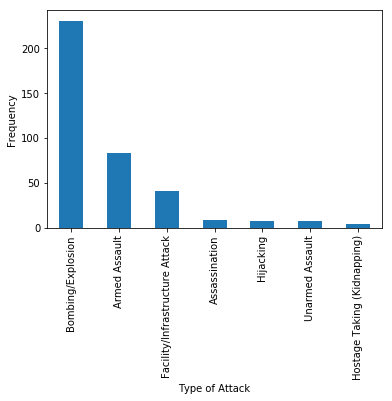

In [60]:
import matplotlib.pyplot as plt

listOfAttacks.plot.bar()
plt.ylabel("Frequency")
plt.xlabel("Type of Attack")
plt.show()

In [61]:
listOfYears = cleaned_data["iyear"].value_counts()
listOfYears = listOfYears.sort_index()
listOfYears

1996     1
1998    42
1999    39
2000    39
2001    56
2002    10
2003    14
2004     3
2005    11
2006     3
2007     7
2008     5
2009    10
2010    17
2011     5
2012    13
2013    32
2014    13
2015    34
2016    29
Name: iyear, dtype: int64

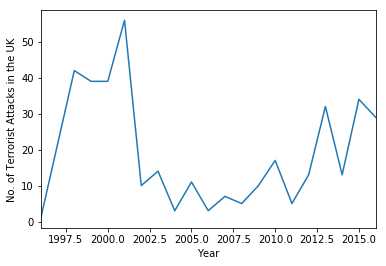

In [62]:
listOfYears.plot()
plt.ylabel("No. of Terrorist Attacks in the UK")
plt.xlabel("Year")
plt.show()

In [65]:
listOfLocations = cleaned_data["location"].value_counts()
listOfLocations.plot

#plt.scatter(listOfYears.index(), listOfYears)
#plt.show()

Belfast (Capital City)                                                                                                                        50
Londonderry (County)                                                                                                                          17
County Antrim                                                                                                                                 12
Down (County)                                                                                                                                  9
County Armagh                                                                                                                                  9
Ulster (Province)                                                                                                                              9
Tyrone (County)                                                                                                                   

In [67]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'